# Data Cleaning Test

In [105]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn as sk
import matplotlib as plt
%matplotlib inline

In [106]:
df1 = pd.read_csv('../Event Recordings/vol1.csv')
df2 = pd.read_csv('../Event Recordings/vol2.csv')

In [107]:
df1.head()

,Timestamp,X,Y,BTN_TOUCH,TOUCH_MAJOR,TOUCH_MINOR,TRACKING_ID,PRESSURE,FINGER
0,0.000000,350,1404,DOWN,11,-420,2526,38,0
1,0.032676,348,1406,HELD,11,-420,2526,38,0
2,0.042109,347,1408,HELD,11,-420,2526,38,0
3,0.049881,344,1411,HELD,11,-420,2526,38,0
4,0.058581,340,1416,HELD,11,-420,2526,38,0


In [108]:
df2.head()

,Timestamp,X,Y,BTN_TOUCH,TOUCH_MAJOR,TOUCH_MINOR,TRACKING_ID,PRESSURE,FINGER
0,0.000000,326,1710,DOWN,10,-420,3537,24,0
1,0.066941,324,-420,NaN,-420,-420,-420,-420,0
2,0.066941,332,264,NaN,10,-420,3538,26,1
3,0.075072,321,1711,HELD,-420,-420,-420,-420,0
4,0.082513,318,1711,HELD,-420,-420,-420,-420,0


# We need to separate data by finger

Because there are duplicate timestamp values allowed when fingers are different. This will cause divide by zero errors in feature extraction.

But the data may need to be recombined before split for training and testing

In [109]:
# finding duplicate timestamps
d = set()
for time in df1['Timestamp']:
    if time in d:
        print(time)
    else:
        d.add(time)

2.5636670000003505
2.5974720000012894
2.605795000001308
2.614234000000579
2.6225870000016585
2.6301260000000184
2.639236000000892
2.647295000000668
2.655696000001626
2.6642100000008213
2.672525000001769
2.6800420000017766
2.6889980000014475
2.696808000000601
2.705669000000853
2.713720000001558
2.722246000001178
2.730591000001368
2.7389190000012604
2.7464790000012727
2.7555800000009185
2.7634020000004966
2.772212000001673
2.7803680000015447
2.78885800000171
2.7976010000002134
2.805593000000954
2.81342400000176
2.822139000001698
2.8301050000009127
2.838991000000533
2.8554610000010143
2.8639680000014778
3.712730000001102
3.762654000000112
3.771331000001737
3.7881090000009854
3.796558000000005
3.804675000001225
3.821058000001358
3.837809000000562
3.854371000001265
3.871042000000671
3.8876630000013392
3.9043490000003658
3.937671000001501
3.970948000000135
3.987613000001147
4.279169000001275
4.311710000001767
4.345601000000897
4.378606000000218
4.395598000000973
4.412498000001506
4.420760000

353.0000290000007
353.0073420000008
353.016031000001
353.023647
353.0315900000005
353.0402860000013
353.0485400000016
353.05717000000004
353.0645680000016
353.0738280000005
353.08156000000054
353.0904050000008
353.1070950000012
353.1313160000009
353.14038100000107
353.1570060000013
353.16510500000004
353.1737240000002
353.19011500000124
353.1978180000005
353.2070390000008
353.2319100000004
353.2647740000011
354.5964980000008
354.6462500000016
354.6552850000008
354.66319600000134
354.6719720000001
354.6801080000005
354.68861800000013
354.69712400000026
354.7052090000016
354.7129130000012
354.721861
354.7300090000008
354.7384810000003
354.74682400000165
354.7551480000002
354.7627590000011
354.77180800000133
354.77974300000096
354.7884490000015
354.79658200000085
354.8051060000016
354.81383800000003
354.82185000000027
354.82945800000016
354.83837100000164
354.8463910000009
354.85501100000147
354.86333100000047
354.87171000000126
354.8792110000013
354.8883190000015
354.8962810000012
354.90

608.307638000002
608.324313000001
608.3409570000003
608.357594000001
608.374243000002
608.390872
608.4073040000003
608.4241719999991
608.4408230000008
608.4574769999999
608.4741070000018
608.4907999999996
608.5071979999993
608.5240970000013
608.5404970000018
608.5574259999994
608.5737929999996
608.5906739999991
608.6073170000018
608.6237309999997
608.6404260000018
608.6572899999992
608.6739390000002
608.6905590000024
608.7072509999998
608.723882000002
608.7405250000011
608.7569230000008
608.7738869999994
608.7904569999992
608.8071180000006
608.8237580000023
608.8404230000015
608.8568100000011
608.8737160000019
608.8904199999997
608.9069880000025
608.9236620000011
608.9400540000024
608.956975000001
608.9736030000022
608.9901270000009
609.0066709999992
609.0235170000014
609.0401840000013
609.0568669999993
609.0735239999995
609.0901159999994
609.1065500000004
609.1232130000026
609.1398929999996
609.1565719999999
609.1731440000003
609.1898419999998
609.2064320000027
609.2231009999996
609.2

727.566611000002
727.6663310000004
727.8829650000007
727.9494799999993
727.9747500000012
728.0075980000001
728.0492699999995
728.0826159999997
728.1068620000005
728.498735000001
728.515413000001
728.532137000002
728.5487329999996
728.5653640000019
728.5820230000027
728.606968
729.7974380000014
729.8140710000007
729.8308309999993
729.8474530000021
729.8639120000007
729.8806089999998
729.8972780000004
729.9220730000015
729.9307590000026
729.9473480000015
729.963917000001
729.9805640000013
729.9972170000001
730.0138829999996
730.030702
730.0471550000002
730.0638529999997
730.0805650000002
730.0972949999996
730.1138380000011
730.1303850000004
730.147111000002
730.1637499999997
730.1803340000006
730.1969720000016
730.2136620000019
730.2302660000023
730.2469359999996
730.2636180000009
730.2803910000002
730.2969320000011
730.3136140000024
730.3301950000023
730.3469010000008
730.363486000002
730.3803399999997
730.3970399999998
730.413456000002
730.4301070000001
730.4467380000024
730.4636050000

827.0792430000001
827.0959210000001
827.1126600000025
827.1291779999992
827.1459170000016
827.1624940000002
827.1791720000001
827.1958090000007
827.2124680000015
827.2290659999999
827.2457780000004
827.262372000001
827.2790190000014
827.2956970000014
827.3123220000016
827.3289960000002
827.3456570000017
827.3623150000021
827.3789270000016
827.395625000001
827.4122260000004
827.42886
827.4456019999998
827.4622180000006
827.4788110000009
827.495471000002
827.5121429999999
827.5287740000022
827.5454610000015
827.5620440000021
827.5787170000003
827.5953430000009
827.6120560000018
827.6286639999998
827.6453490000022
827.6619930000015
827.6786539999994
827.6953380000014
827.712055
827.7286029999996
827.7452650000014
827.7619250000025
827.7787910000006
827.7952509999996
827.8119210000004
827.8285140000007
827.84519
827.861831000002
827.8784730000007
827.8951149999994
827.9118120000021
827.9284120000011
827.9450600000018
827.961765
827.9783610000013
827.9950570000001
828.0116789999993
828.0283

In [110]:
df1 = df1.sort_values(['FINGER','Timestamp'])

In [111]:
# df1sort.to_csv('FingerSort.csv')
# this is just to check it was sorted correctly

In [113]:
df2 = df2.sort_values(['FINGER','Timestamp'])

In [114]:
df2.head()

,Timestamp,X,Y,BTN_TOUCH,TOUCH_MAJOR,TOUCH_MINOR,TRACKING_ID,PRESSURE,FINGER
0,0.000000,326,1710,DOWN,10,-420,3537,24,0
1,0.066941,324,-420,NaN,-420,-420,-420,-420,0
3,0.075072,321,1711,HELD,-420,-420,-420,-420,0
4,0.082513,318,1711,HELD,-420,-420,-420,-420,0
5,0.091629,316,1711,HELD,-420,-420,-420,-420,0


# Convert string data to numerical data

In [115]:
df1 = pd.get_dummies(df1,columns=['BTN_TOUCH'],drop_first=True)
df2 = pd.get_dummies(df2,columns=['BTN_TOUCH'],drop_first=True)

In [116]:
df1.head()

,Timestamp,X,Y,TOUCH_MAJOR,TOUCH_MINOR,TRACKING_ID,PRESSURE,FINGER,BTN_TOUCH_HELD,BTN_TOUCH_UP
0,0.000000,350,1404,11,-420,2526,38,0,0,0
1,0.032676,348,1406,11,-420,2526,38,0,1,0
2,0.042109,347,1408,11,-420,2526,38,0,1,0
3,0.049881,344,1411,11,-420,2526,38,0,1,0
4,0.058581,340,1416,11,-420,2526,38,0,1,0


In [117]:
df2.head()

,Timestamp,X,Y,TOUCH_MAJOR,TOUCH_MINOR,TRACKING_ID,PRESSURE,FINGER,BTN_TOUCH_HELD,BTN_TOUCH_UP
0,0.000000,326,1710,10,-420,3537,24,0,0,0
1,0.066941,324,-420,-420,-420,-420,-420,0,0,0
3,0.075072,321,1711,-420,-420,-420,-420,0,1,0
4,0.082513,318,1711,-420,-420,-420,-420,0,1,0
5,0.091629,316,1711,-420,-420,-420,-420,0,1,0


# Check for missing data

<AxesSubplot:>

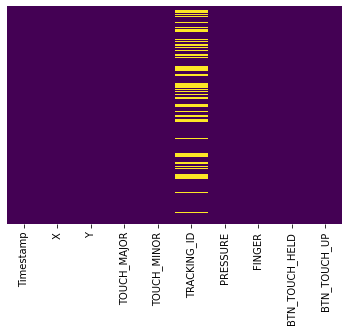

In [118]:
sb.heatmap(df1,yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

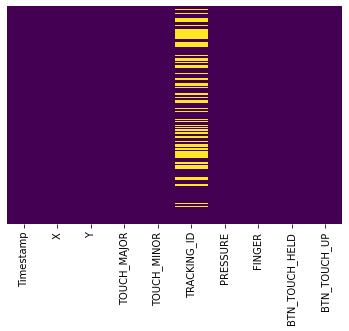

In [119]:
sb.heatmap(df2,yticklabels=False,cbar=False,cmap='viridis')

# Handle Missing Data

Either Remove Rows, Remove Column, or Fill with Data

In [64]:
df1dropCol = df1.drop('TRACKING_ID',axis=1)

<AxesSubplot:>

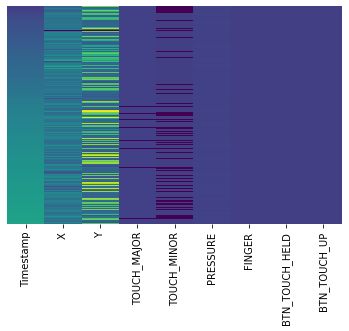

In [65]:
sb.heatmap(df1dropCol,yticklabels=False,cbar=False,cmap='viridis')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59565 entries, 0 to 59564
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       59565 non-null  float64
 1   X               59565 non-null  int64  
 2   Y               59565 non-null  int64  
 3   TOUCH_MAJOR     59565 non-null  int64  
 4   TOUCH_MINOR     59565 non-null  int64  
 5   PRESSURE        59565 non-null  int64  
 6   FINGER          59565 non-null  int64  
 7   BTN_TOUCH_HELD  59565 non-null  uint8  
 8   BTN_TOUCH_UP    59565 non-null  uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 3.3 MB


# Divide data into gestures

Each gesture is made of x datapoints. Sometimes this is done using time instead but then gestures have varying amounts of data (good or bad?)